### Problem Statement

##X Education sells online courses to industry professionals. The typical lead conversion rate at X education is around 30%. X Education needs help select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [10]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Data Inspection and understanding

In [12]:
# Loading the data using Pandas
df = pd.read_csv(r"C:\Users\146998\OneDrive - Garrett Advancing Motion\Desktop\DS\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
df.shape

(9240, 37)

In [15]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [16]:
#Data cleaning 

In [17]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)   # Converting all the value to lower case

In [18]:
df = df.replace('select',np.nan)         # Replace select with NaN

In [19]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [20]:
# dropping unique value columns

In [21]:
df_1 = df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1)

In [22]:
#finding missing value columns

In [23]:
round(100*(df_1.isnull().sum()/len(df_1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
# dropping columns with missing value more than 35%

In [25]:
for col in df_1.columns:
    if df_1[col].isnull().sum()>3000:
        df_1.drop(col, axis=1,inplace=True)

In [26]:
round(df_1.isnull().sum()*100/len(df_1),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [27]:
# Prospect ID, Lead Number is not useful. can be dropped rom dataset

In [28]:
df_1['Country'].value_counts()

Country
india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malays

In [29]:
# Max leads from India and Country columns is not useful, can be dropped from dataset

In [30]:
df_2 = df_1.drop(['Prospect ID','Lead Number','Country',],axis=1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   What is your current occupation                6550 

In [31]:
df_2.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Newspaper Article                                   0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Lead Origin                                         0
Search                                              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Last Notable Activity       

In [32]:
# Dropping the null values rows in the column 'TotalVisits'

df_2 = df_2[~pd.isnull(df_2['What matters most to you in choosing a course'])]

In [33]:
df_2 = df_2[~pd.isnull(df_2['TotalVisits'])]
df_2 = df_2[~pd.isnull(df_2['Page Views Per Visit'])]
df_2 = df_2[~pd.isnull(df_2['Last Activity'])]
df_2 = df_2[~pd.isnull(df_2['Lead Source'])]

In [34]:
# Checking categorical variable 

In [35]:
for col in df_2:
    print(df_2[col].astype('category').value_counts())
    print("-----------------------------------------------")

Lead Origin
landing page submission    3624
api                        2140
lead add form               581
lead import                  27
Name: count, dtype: int64
-----------------------------------------------
Lead Source
google               2048
direct traffic       1873
olark chat            892
organic search        870
reference             443
welingak website      129
referral sites         74
facebook               28
click2call              4
bing                    3
live chat               2
social media            2
pay per click ads       1
press_release           1
testone                 1
welearn                 1
Name: count, dtype: int64
-----------------------------------------------
Do Not Email
no     5938
yes     434
Name: count, dtype: int64
-----------------------------------------------
Do Not Call
no     6370
yes       2
Name: count, dtype: int64
-----------------------------------------------
Converted
0    3307
1    3065
Name: count, dtype: int64
-------

In [36]:
# EDA 

In [37]:
df['Lead Source'].value_counts()

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

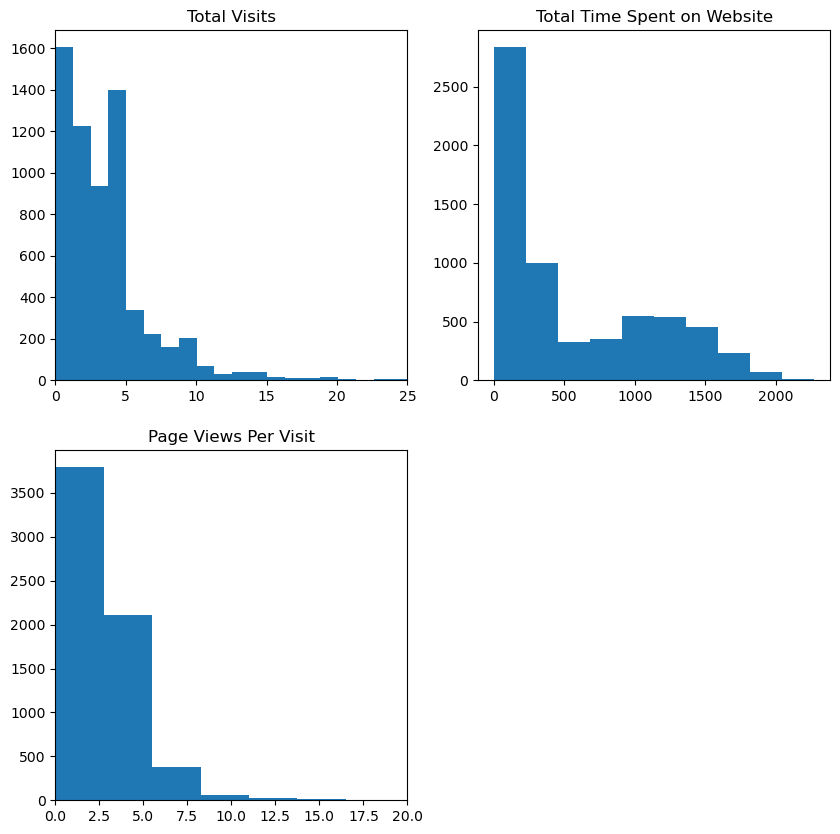

In [38]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

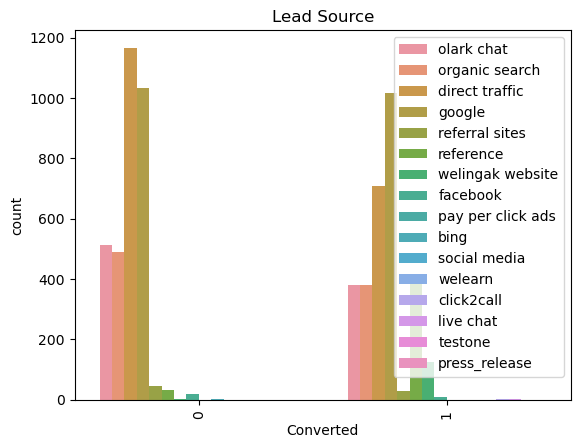

In [39]:
sns.countplot(x='Converted', hue='Lead Source', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.legend(loc='best')
plt.show()

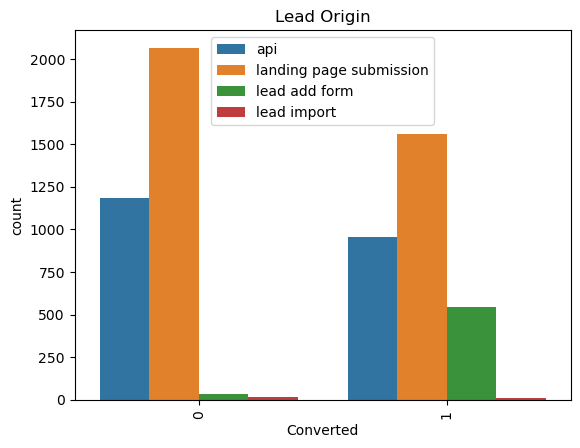

In [40]:
sns.countplot(x='Converted', hue='Lead Origin', data= df_2).tick_params(axis='x', rotation = 90)
plt.legend(loc='upper center')
plt.title('Lead Origin')
plt.show()

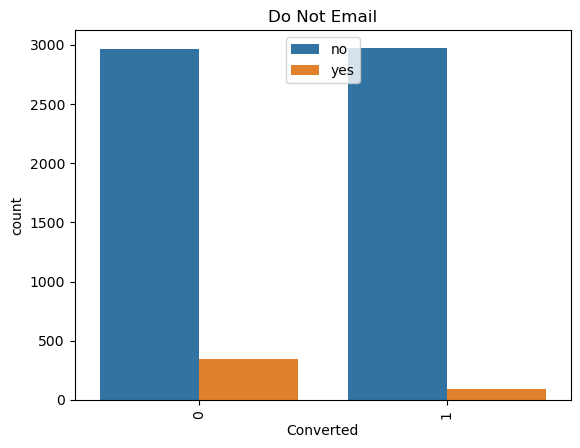

In [41]:
sns.countplot(x='Converted', hue='Do Not Email', data= df_2).tick_params(axis='x', rotation = 90)
plt.legend(loc='upper center')
plt.title('Do Not Email')
plt.show()

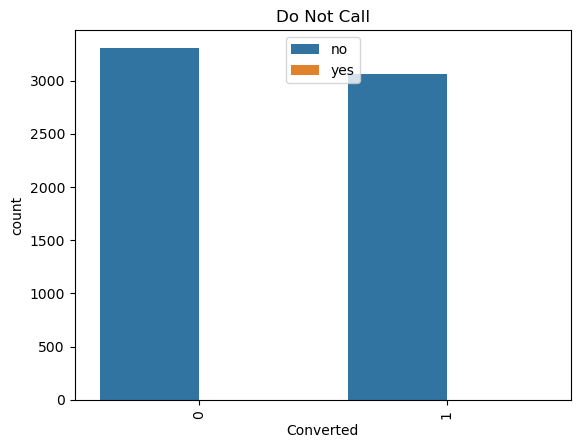

In [42]:
sns.countplot(x='Converted', hue='Do Not Call', data= df_2).tick_params(axis='x', rotation = 90)
plt.legend(loc='upper center')
plt.title('Do Not Call')
plt.show()

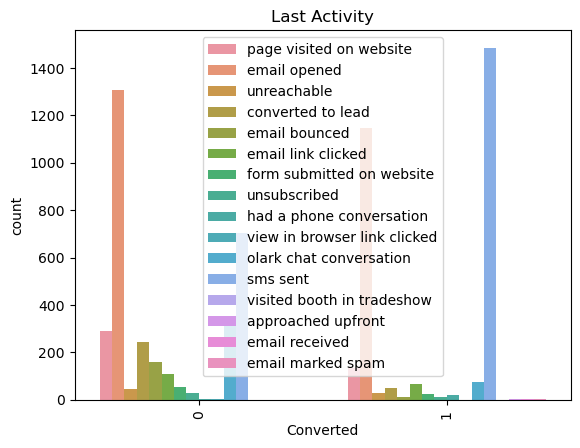

In [43]:
sns.countplot(x='Converted', hue='Last Activity', data= df_2).tick_params(axis='x', rotation = 90)
plt.legend(loc='upper center')
plt.title('Last Activity')
plt.show()

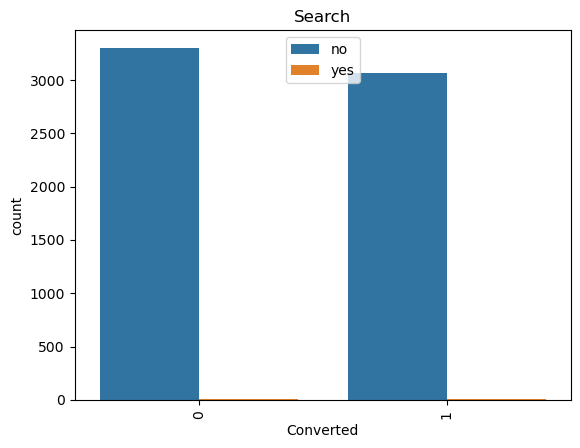

In [44]:
sns.countplot(x='Converted', hue='Search', data= df_2).tick_params(axis='x', rotation = 90)
plt.legend(loc='upper center')
plt.title('Search')
plt.show()

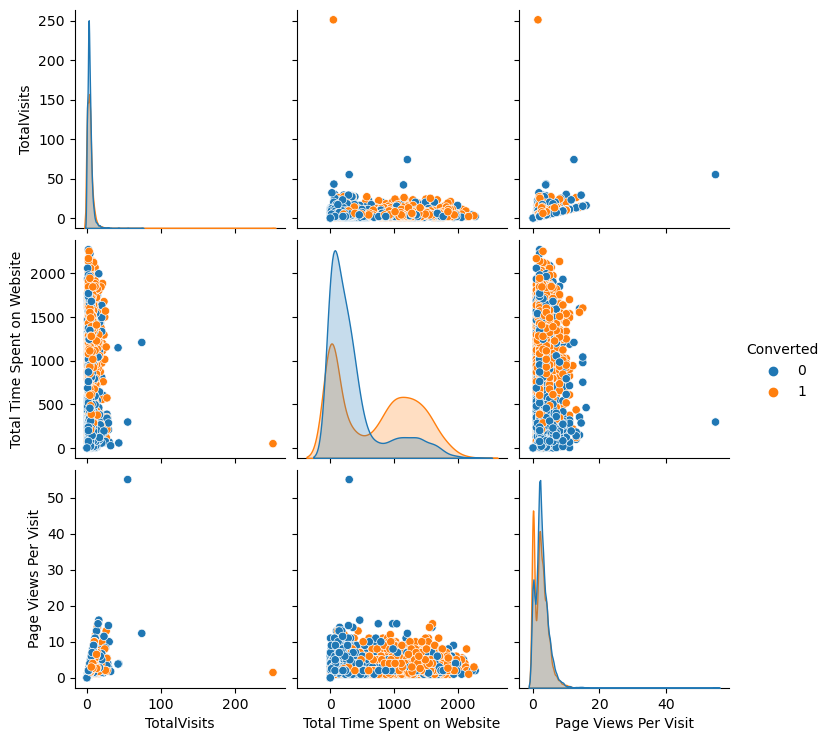

In [45]:
sns.pairplot(df_2,diag_kind='kde',hue='Converted')
plt.show()

In [46]:
# Checking the columns which are of type 'object'

temp = df_2.loc[:,df_2.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
dummy = pd.get_dummies(temp,dtype=int,drop_first=True)

In [48]:
df_3 = pd.concat([df_2, dummy], axis=1)
df_3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,unemployed,...,0,0,0,1,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,unemployed,...,1,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,student,...,1,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,unemployed,...,0,0,0,1,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,unemployed,...,0,0,0,1,0,0,0,0,0,0


In [49]:
df_4=df_3.drop(temp, axis=1)

In [50]:
df_4.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
# test - train split

In [52]:
X = df_4.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [53]:
y = df_4['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# 70% train and remaining test data set

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
# Rescaling nummeric features

In [57]:
# three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
4170,0.015936,0.408891,0.2500,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6812,0.063745,0.539613,0.1250,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7717,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
207,0.019920,0.157570,0.3125,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2044,0.007968,0.163292,0.1250,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# check correlation

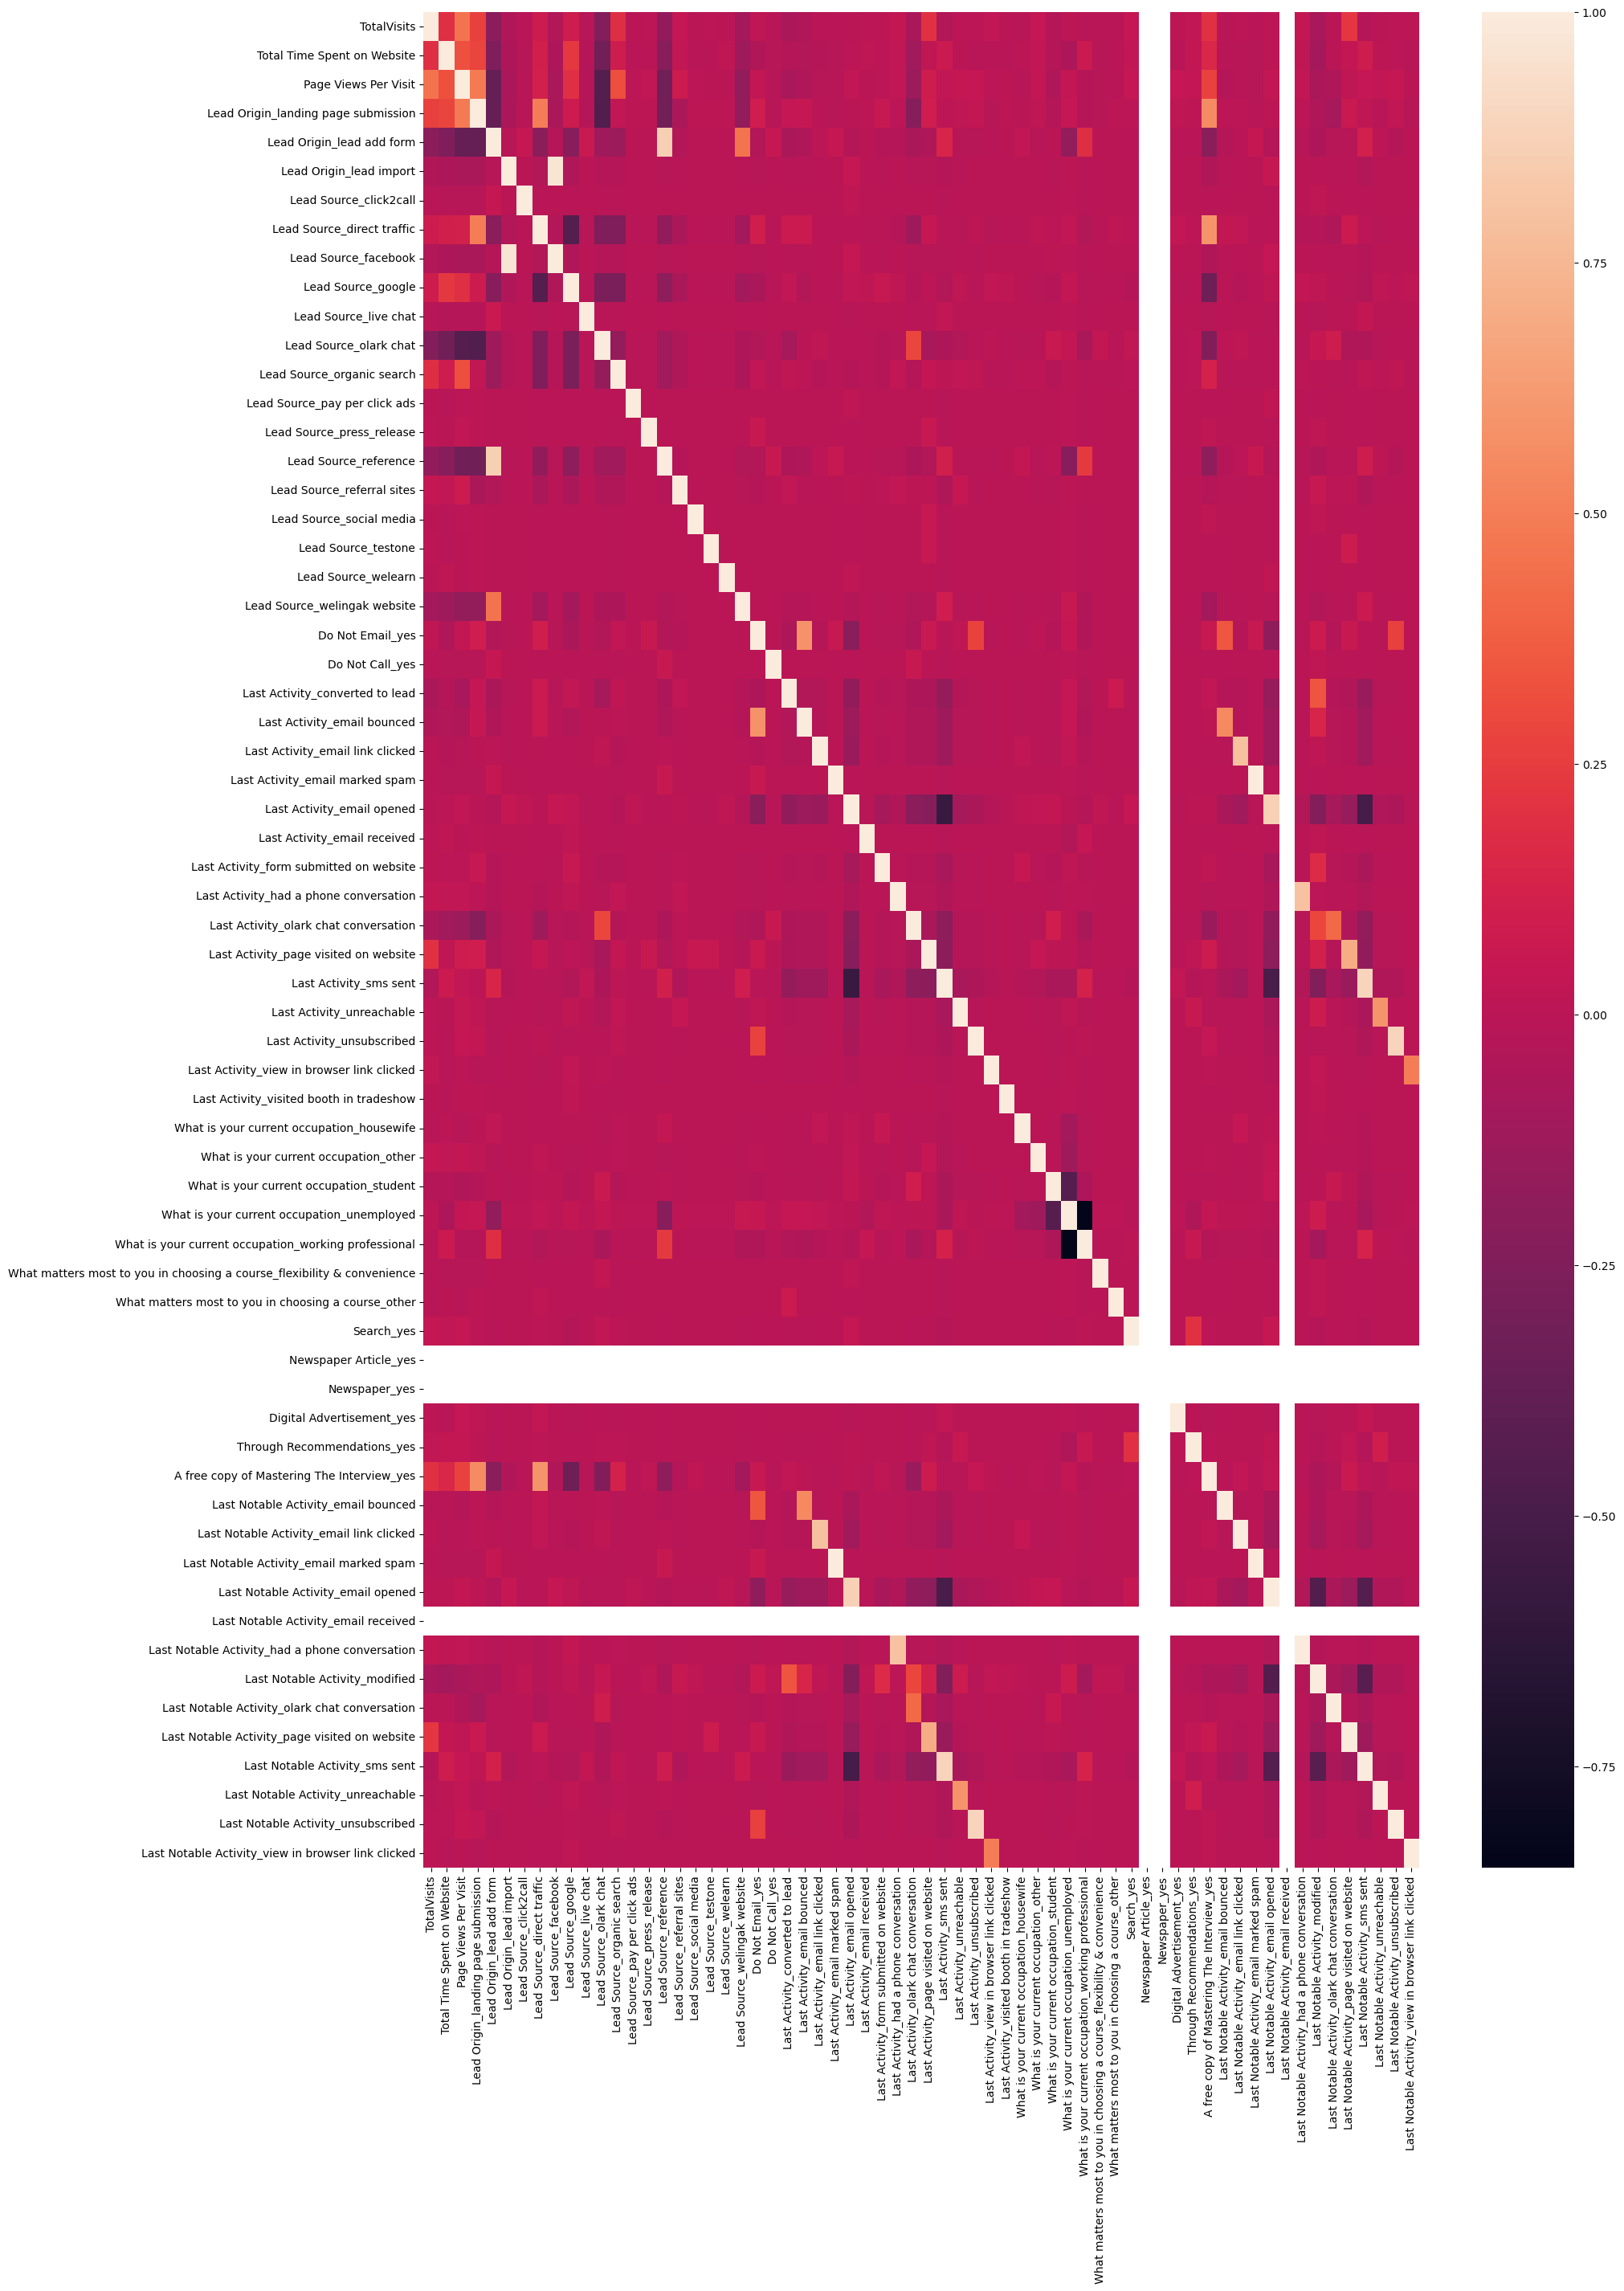

In [59]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [60]:
logreg = LogisticRegression()

In [61]:
rfe = RFE(logreg,n_features_to_select=15)

In [62]:
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_landing page submission', False, 39),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 28),
 ('Lead Source_click2call', False, 12),
 ('Lead Source_direct traffic', False, 10),
 ('Lead Source_facebook', False, 29),
 ('Lead Source_google', False, 20),
 ('Lead Source_live chat', False, 34),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 19),
 ('Lead Source_pay per click ads', False, 30),
 ('Lead Source_press_release', False, 44),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', False, 21),
 ('Lead Source_social media', False, 38),
 ('Lead Source_testone', False, 26),
 ('Lead Source_welearn', False, 31),
 ('Lead Source_welingak website', True, 1),
 ('Do Not Email_yes', True, 1),
 ('Do Not Call_yes', False, 22),
 ('Last Activity_converted to lead', False, 8),
 ('Last Activity_email bounced', Fa

In [64]:
col = X_train.columns[rfe.support_]

In [65]:
X_train = X_train[col]

### Model 1

In [67]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.7
Date:                Fri, 29 Nov 2024   Deviance:                       4093.4
Time:                        12:54:40   Pearson chi2:                 4.60e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3731
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1954      0.616     -0.317      0.751      -1.403       1.012
TotalVisits                                              9.1848      2.962      3.101      0.002       3.379      14.991
Total Time Spent on Website                              4.4947      0.189     23.834      0.000       4.125       4.864
Lead Origin_lead add form                                1.9738      0.987      2.000      0.045       0.040       3.908
Lead Source_olark chat                                   1.5170      0.125     12.135      0.000       1.272       1.762
Lead Source_reference                                    2.0379      1.011      2.016      0.044       0.056       4.019
Lead Source_welingak website                             4.2664      1.409      3.028      0.002       1.505       7.028
Do Not Email_yes                                        -1.3402      0.190     -7.053      0.000      -1.713      -0.968
Last Activity_had a phone conversation                   1.5489      1.006      1.539      0.124      -0.424       3.521
Last Activity_sms sent                                   1.0057      0.084     11.966      0.000       0.841       1.170
What is your current occupation_student                 -1.8946      0.646     -2.932      0.003      -3.161      -0.628
What is your current occupation_unemployed              -1.8426      0.609     -3.025      0.002      -3.037      -0.649
What is your current occupation_working professional     0.6445      0.637      1.012      0.312      -0.604       1.893
Last Notable Activity_had a phone conversation          21.3626   1.21e+04      0.002      0.999   -2.36e+04    2.36e+04
Last Notable Activity_modified                          -0.8393      0.090     -9.309      0.000      -1.016      -0.663
Last Notable Activity_unreachable                        2.5422      0.802      3.171      0.002       0.971       4.114
========================================================================================================================
"""

In [68]:
# Few variable having high P values which needs to be addressed

In [69]:
# Checking VIF

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_lead add form,69.36
4,Lead Source_reference,53.91
5,Lead Source_welingak website,16.55
10,What is your current occupation_unemployed,4.66
7,Last Activity_had a phone conversation,2.85
12,Last Notable Activity_had a phone conversation,2.85
1,Total Time Spent on Website,2.42
8,Last Activity_sms sent,1.69
0,TotalVisits,1.68
11,What is your current occupation_working profes...,1.65


In [71]:
X_train.drop('Lead Origin_lead add form', axis = 1, inplace = True)

### Model 2

In [73]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.8
Date:                Fri, 29 Nov 2024   Deviance:                       4097.6
Time:                        12:54:40   Pearson chi2:                 4.60e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3725
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1836      0.616     -0.298      0.766      -1.391       1.024
TotalVisits                                              8.9399      2.951      3.029      0.002       3.156      14.724
Total Time Spent on Website                              4.4812      0.188     23.816      0.000       4.112       4.850
Lead Source_olark chat                                   1.5107      0.125     12.117      0.000       1.266       1.755
Lead Source_reference                                    4.0007      0.248     16.135      0.000       3.515       4.487
Lead Source_welingak website                             6.2288      1.012      6.155      0.000       4.245       8.212
Do Not Email_yes                                        -1.3426      0.190     -7.070      0.000      -1.715      -0.970
Last Activity_had a phone conversation                   1.5482      1.006      1.539      0.124      -0.423       3.519
Last Activity_sms sent                                   1.0060      0.084     11.975      0.000       0.841       1.171
What is your current occupation_student                 -1.8976      0.646     -2.937      0.003      -3.164      -0.631
What is your current occupation_unemployed              -1.8422      0.609     -3.025      0.002      -3.036      -0.648
What is your current occupation_working professional     0.6411      0.637      1.007      0.314      -0.607       1.889
Last Notable Activity_had a phone conversation          21.3610   1.21e+04      0.002      0.999   -2.36e+04    2.36e+04
Last Notable Activity_modified                          -0.8410      0.090     -9.335      0.000      -1.018      -0.664
Last Notable Activity_unreachable                        2.5364      0.802      3.164      0.002       0.965       4.107
========================================================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,4.66
6,Last Activity_had a phone conversation,2.85
11,Last Notable Activity_had a phone conversation,2.85
1,Total Time Spent on Website,2.42
7,Last Activity_sms sent,1.69
0,TotalVisits,1.68
10,What is your current occupation_working profes...,1.65
12,Last Notable Activity_modified,1.57
2,Lead Source_olark chat,1.45
3,Lead Source_reference,1.33


In [75]:
# all varaible VIF is less than 5. and lets drop Last Notable Activity_had a phone conversation whihc has high p value

In [76]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

### Model 3

In [78]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.7
Date:                Fri, 29 Nov 2024   Deviance:                       4101.5
Time:                        12:54:40   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3719
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1809      0.616     -0.294      0.769      -1.388       1.026
TotalVisits                                              9.0141      2.949      3.057      0.002       3.234      14.794
Total Time Spent on Website                              4.4761      0.188     23.797      0.000       4.107       4.845
Lead Source_olark chat                                   1.5109      0.125     12.117      0.000       1.266       1.755
Lead Source_reference                                    4.0016      0.248     16.136      0.000       3.516       4.488
Lead Source_welingak website                             6.2290      1.012      6.155      0.000       4.246       8.212
Do Not Email_yes                                        -1.3428      0.190     -7.071      0.000      -1.715      -0.971
Last Activity_had a phone conversation                   2.8183      0.802      3.513      0.000       1.246       4.391
Last Activity_sms sent                                   1.0045      0.084     11.959      0.000       0.840       1.169
What is your current occupation_student                 -1.8978      0.646     -2.938      0.003      -3.164      -0.632
What is your current occupation_unemployed              -1.8420      0.609     -3.024      0.002      -3.036      -0.648
What is your current occupation_working professional     0.6412      0.637      1.007      0.314      -0.607       1.889
Last Notable Activity_modified                          -0.8493      0.090     -9.436      0.000      -1.026      -0.673
Last Notable Activity_unreachable                        2.5331      0.802      3.160      0.002       0.962       4.104
========================================================================================================================
"""

In [79]:
# What is your current occupation_working professional coluum has high p value , can be dropped.

In [80]:
X_train.drop('What is your current occupation_working professional', axis = 1, inplace = True)

### Model 4

In [82]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.2
Date:                Fri, 29 Nov 2024   Deviance:                       4102.4
Time:                        12:54:41   Pearson chi2:                 4.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3718
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4121      0.202      2.043      0.041       0.017       0.807
TotalVisits                                    8.8860      2.945      3.017      0.003       3.114      14.658
Total Time Spent on Website                    4.4755      0.188     23.793      0.000       4.107       4.844
Lead Source_olark chat                         1.5094      0.125     12.111      0.000       1.265       1.754
Lead Source_reference                          3.9999      0.248     16.132      0.000       3.514       4.486
Lead Source_welingak website                   6.2263      1.012      6.152      0.000       4.243       8.210
Do Not Email_yes                              -1.3425      0.190     -7.067      0.000      -1.715      -0.970
Last Activity_had a phone conversation         2.8211      0.802      3.517      0.000       1.249       4.393
Last Activity_sms sent                         1.0070      0.084     12.000      0.000       0.842       1.171
What is your current occupation_student       -2.4888      0.286     -8.716      0.000      -3.048      -1.929
What is your current occupation_unemployed    -2.4332      0.187    -13.039      0.000      -2.799      -2.067
Last Notable Activity_modified                -0.8502      0.090     -9.445      0.000      -1.027      -0.674
Last Notable Activity_unreachable              2.5345      0.801      3.163      0.002       0.964       4.105
==============================================================================================================
"""

In [83]:
#Checking VIF

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,3.42
1,Total Time Spent on Website,2.03
0,TotalVisits,1.58
7,Last Activity_sms sent,1.57
10,Last Notable Activity_modified,1.49
2,Lead Source_olark chat,1.35
3,Lead Source_reference,1.13
5,Do Not Email_yes,1.09
4,Lead Source_welingak website,1.08
8,What is your current occupation_student,1.08


In [85]:
# We can finaliza Model 4 since, VIF below 5 and P value for all variable are low.

### Model Evaluation 

In [87]:
# Predict y using X_train 

In [88]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

4170    0.722604
6812    0.723186
7717    0.374788
207     0.120352
2044    0.112077
3330    0.781456
6498    0.042487
2085    0.985300
6260    0.195067
19      0.070958
dtype: float64

In [89]:
# reshaping into array

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72260351, 0.72318608, 0.37478841, 0.12035204, 0.1120769 ,
       0.78145649, 0.04248733, 0.98530027, 0.19506711, 0.070958  ])

In [91]:
# Dataset woth actual conversion and prob predicted model

In [92]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.722604
1,1,0.723186
2,1,0.374788
3,0,0.120352
4,0,0.112077


In [93]:
#create new dataset with "Predicted with 1 if prob>0.5 , else it is 0

In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.722604,1
1,1,0.723186,1
2,1,0.374788,0
3,0,0.120352,0
4,0,0.112077,0


In [95]:
# Create confusion matrix

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1941  378]
 [ 561 1580]]


In [97]:
# Check accuracy 

In [98]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7894618834080718


In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
#Sensitivity

TP/(TP+FN)

0.7379729098552078

In [101]:
# Specificity 

TN/(TN+FP)

0.8369987063389392

### Finding Optimal cut off

In [103]:
#Initially, Cut off 0.5 given randomly to check the model performance.in order to improve the model performance, we need to optimise using ROC curve 

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

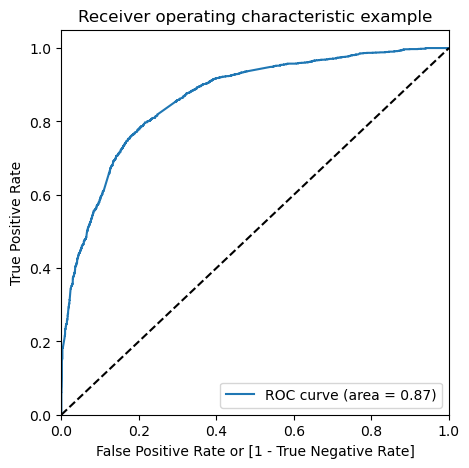

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [107]:
# Area under the curve is 0.87 which is good. it shows model is good 

In [108]:
# Create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.722604,1,1,1,1,1,1,1,1,1,0,0
1,1,0.723186,1,1,1,1,1,1,1,1,1,0,0
2,1,0.374788,0,1,1,1,1,0,0,0,0,0,0
3,0,0.120352,0,1,1,0,0,0,0,0,0,0,0
4,0,0.112077,0,1,1,0,0,0,0,0,0,0,0


In [109]:
# Create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480045  1.000000  0.000000
0.1   0.1  0.575561  0.987389  0.195343
0.2   0.2  0.691480  0.949556  0.453213
0.3   0.3  0.763453  0.898645  0.638637
0.4   0.4  0.786996  0.801495  0.773609
0.5   0.5  0.789462  0.737973  0.836999
0.6   0.6  0.777803  0.675385  0.872359
0.7   0.7  0.742601  0.553480  0.917206
0.8   0.8  0.708296  0.444185  0.952135
0.9   0.9  0.641480  0.270901  0.983614


In [110]:
# plot the graph

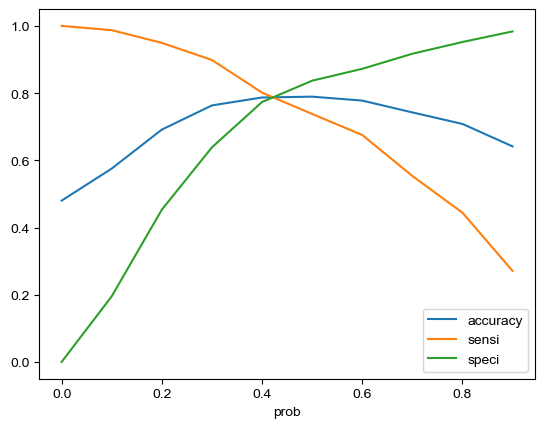

In [111]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
sns.set(style="whitegrid")
plt.show()

In [112]:
#Optimum cutoff 0.42 and lets use new cutoff 

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.722604,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.723186,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.374788,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.120352,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.112077,0,1,1,0,0,0,0,0,0,0,0,0


In [114]:
# checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7890134529147982

In [115]:
# Create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1835,  484],
       [ 457, 1684]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Sensitivity'

TP/(TP+FN)

0.7865483418963102

In [118]:
# 'Specificity'

TN/(TN+FP)

0.7912893488572661

In [119]:
# Cut off seems to be good.

### Prediction on test dataset

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4460 entries, 4170 to 8219
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   TotalVisits                                 4460 non-null   float64
 1   Total Time Spent on Website                 4460 non-null   float64
 2   Lead Source_olark chat                      4460 non-null   int32  
 3   Lead Source_reference                       4460 non-null   int32  
 4   Lead Source_welingak website                4460 non-null   int32  
 5   Do Not Email_yes                            4460 non-null   int32  
 6   Last Activity_had a phone conversation      4460 non-null   int32  
 7   Last Activity_sms sent                      4460 non-null   int32  
 8   What is your current occupation_student     4460 non-null   int32  
 9   What is your current occupation_unemployed  4460 non-null   int32  
 10  Last Notable A

In [122]:
X_test = X_test[X_train.columns]

In [123]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_olark chat,Lead Source_reference,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,Last Notable Activity_modified,Last Notable Activity_unreachable
8402,2.0,1412,0,0,0,0,0,0,0,1,1,0
8782,5.0,559,0,0,0,0,0,0,0,1,1,0
6199,3.0,942,0,0,0,0,0,1,0,1,0,0
6482,0.0,0,1,0,0,0,0,0,0,1,0,0
6026,0.0,0,0,1,0,0,0,0,0,1,0,0


In [124]:
X_test.shape

(1912, 12)

In [125]:
X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits',  'Total Time Spent on Website']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_olark chat,Lead Source_reference,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,Last Notable Activity_modified,Last Notable Activity_unreachable
8402,0.036364,0.626720,0,0,0,0,0,0,0,1,1,0
8782,0.090909,0.248114,0,0,0,0,0,0,0,1,1,0
6199,0.054545,0.418109,0,0,0,0,0,1,0,1,0,0
6482,0.000000,0.000000,1,0,0,0,0,0,0,1,0,0
6026,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0


In [126]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [127]:
y_test_pred[:10]

8402    0.563823
8782    0.278268
6199    0.792778
6482    0.374788
6026    0.878549
5991    0.430650
3812    0.496624
6307    0.287122
7344    0.804593
4171    0.148427
dtype: float64

In [128]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [129]:
y_pred_1.head()

,0
8402,0.563823
8782,0.278268
6199,0.792778
6482,0.374788
6026,0.878549


In [130]:
y_test_df = pd.DataFrame(y_test)

In [131]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [132]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [133]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [134]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.563823
1,0,0.278268
2,1,0.792778
3,1,0.374788
4,1,0.878549


In [135]:
# Make predictions on the test set using 0.42 cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [136]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.563823,1
1,0,0.278268,0
2,1,0.792778,1
3,1,0.374788,0
4,1,0.878549,1


In [140]:
y_pred_final['Lead_Score'] = y_pred_final['Conversion_Prob'].apply(lambda x : round(x*100))
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.563823,1,56
1,0,0.278268,0,28
2,1,0.792778,1,79
3,1,0.374788,0,37
4,1,0.878549,1,88


In [359]:
#Accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7615062761506276

In [360]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[671, 317],
       [139, 785]], dtype=int64)

In [361]:
P = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [362]:
#'sensitivity'
TP/(TP+FN)

0.9237520570488206

In [363]:
# 'specificity'
TN/(TN+FP)

0.6791497975708503

In [364]:
df['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64